# Selective Inference via outcome Randomisation and Mirror Statistics

In [11]:
using Pkg
Pkg.status()

using GLM
using GLMNet
using Distributions
using Random
using StatsPlots
using Plots
using DataFrames
using CSV

Project selective_inference_project v0.1.0
Status `~/Documents/UiO_Postdoc/Code/git_repositories/SelectiveInference/Project.toml`
  [336ed68f] CSV v0.10.11
⌃ [31c24e10] Distributions v0.25.100
⌃ [38e38edf] GLM v1.8.3
  [8d5ece8b] GLMNet v0.7.2
⌃ [6f49c342] RCall v0.13.17
  [f3b207a7] StatsPlots v0.15.6
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [2]:
include("./utilities/data_generation.jl")
include("./utilities/randomisation_ds.jl")
include("./utilities/mirror_statistic.jl")
include("./utilities/classification_metrics.jl");

In [3]:
include("./wrapper_pipeline_inference.jl");

In [4]:
function print_metrics(;scenario, results)
    println("-------------------- $scenario --------------------")
    
    for (metric, value) in zip(keys(results.class_metrics), results.class_metrics)
        println("$metric ==> $value")
    end
end

print_metrics (generic function with 1 method)

In [5]:
function double_boxplot(;df, group_var, var_one, var_two, title_plot)
    max_y = maximum(
        (maximum(df[!, var_one]),
        maximum(df[!, var_two]))
    )
    min_y = minimum(
        (minimum(df[!, var_one]),
        minimum(df[!, var_two]))
    )
    l = @layout [grid(1, 2)]
    p1 = @df df boxplot(string.(cols(group_var)), cols(var_one), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_one))
    p2 = @df df boxplot(string.(cols(group_var)), cols(var_two), group=cols(group_var), label=false)
    ylims!((min_y, max_y))
    xlabel!(string(group_var))
    title!(string(var_two))
    all_p = plot(p1, p2, layout = l)
    all_p[:plot_title] = title_plot
    plot(all_p)
end;

## Simulation on uncorrelated covariates

### Low-dimensional case
30% of coefficients are 0

In [79]:
n = 100
p = 20
prop_zero_coef = 0.3
beta_intercept = 1.
sigma2 = 1.
correlation_coefficients = []
scenario = "Low-Dimensional, No Correlation, Random Cov"

Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    block_covariance=false,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [80]:
print_metrics(scenario=scenario, results=results)

-------------------- Low-Dimensional, No Correlation, Random Cov --------------------
FDR_rand_plus_MS ==> 0.125
FDR_rand_only ==> 0.0
FDR_MS_only ==> 0.0
TPR_rand_plus_MS ==> 1.0
TPR_rand_only ==> 1.0
TPR_MS_only ==> 1.0


### High-dimensional case
70% of coefficients are 0

In [6]:
n = 500
p = 500
prop_zero_coef=0.9
beta_intercept=1.
sigma2=1.
correlation_coefficients=[]
block_covariance=false
scenario = "SAME AS PAPER - High-Dimensional, No Correlation, Random Cov"

"SAME AS PAPER - High-Dimensional, No Correlation, Random Cov"

In [7]:
Random.seed!(13)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    block_covariance=block_covariance,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

print_metrics(scenario=scenario, results=results)

-------------------- SAME AS PAPER - High-Dimensional, No Correlation, Random Cov --------------------
FDR_rand_plus_MS ==> 0.07407407407407407
FDR_rand_only ==> 0.12280701754385964
FDR_MS_only ==> 0.09090909090909091
TPR_rand_plus_MS ==> 1.0
TPR_rand_only ==> 1.0
TPR_MS_only ==> 1.0


In [8]:
Random.seed!(1335)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    block_covariance=block_covariance,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

print_metrics(scenario=scenario, results=results)

-------------------- SAME AS PAPER - High-Dimensional, No Correlation, Random Cov --------------------
FDR_rand_plus_MS ==> 0.09090909090909091
FDR_rand_only ==> 0.13793103448275862
FDR_MS_only ==> 0.0196078431372549
TPR_rand_plus_MS ==> 1.0
TPR_rand_only ==> 1.0
TPR_MS_only ==> 1.0


## Correlated covariates

### Low-dimensional case
30% of coefficients are 0

In [87]:
n = 100
p = 20
prop_zero_coef=0.3
beta_intercept=1.
sigma2=1.
correlation_coefficients=[0.5, 0.3]
block_covariance=false
scenario = "Low-Dimensional, With Correlation, Random Cov"

Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    block_covariance=block_covariance,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [88]:
print_metrics(scenario=scenario, results=results)

-------------------- Low-Dimensional, With Correlation, Random Cov --------------------
FDR_rand_plus_MS ==> 0.17647058823529413
FDR_rand_only ==> 0.0
FDR_MS_only ==> 0.06666666666666667
TPR_rand_plus_MS ==> 1.0
TPR_rand_only ==> 0.9285714285714286
TPR_MS_only ==> 1.0


### High-dimensional case
70% of coefficients are 0

In [9]:
n = 100
p = 200
prop_zero_coef=0.9
beta_intercept=1.
sigma2=1.
correlation_coefficients=[0.5, 0.3]
block_covariance=false
scenario = "High-Dimensional, With Correlation, Random Cov"

Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    block_covariance=block_covariance,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [10]:
print_metrics(scenario=scenario, results=results)

-------------------- High-Dimensional, With Correlation, Random Cov --------------------
FDR_rand_plus_MS ==> 0.05
FDR_rand_only ==> 0.0625
FDR_MS_only ==> 0.5
TPR_rand_plus_MS ==> 0.95
TPR_rand_only ==> 0.75
TPR_MS_only ==> 0.2


#### With Block diagonal matrix
Covariates from one block belongs to S1 (coeffs != 0) and covariates from the other block belong to S0 (coeff = 0) 

In [91]:
n = 100
p = 20
prop_zero_coef=0.5
beta_intercept=1.
sigma2=1.
correlation_coefficients=[0.5]
block_covariance = true
scenario = "Low-Dimensional, with Correlation, Block Cov"

Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    block_covariance=block_covariance,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [92]:
print_metrics(scenario=scenario, results=results)

-------------------- Low-Dimensional, with Correlation, Block Cov --------------------
FDR_rand_plus_MS ==> 0.0
FDR_rand_only ==> 0.0
FDR_MS_only ==> 0.1
TPR_rand_plus_MS ==> 0.8
TPR_rand_only ==> 0.4
TPR_MS_only ==> 0.9


In [97]:
n = 100
p = 200
prop_zero_coef=0.8
beta_intercept=1.
sigma2=1.
correlation_coefficients=[0.5, 0.4]
block_covariance = true
scenario = "High-Dimensional, with Correlation, block Cov"

Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    block_covariance=block_covariance,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [98]:
print_metrics(scenario=scenario, results=results)

-------------------- High-Dimensional, with Correlation, block Cov --------------------
FDR_rand_plus_MS ==> 0.38461538461538464
FDR_rand_only ==> 0.07692307692307693
FDR_MS_only ==> 0.125
TPR_rand_plus_MS ==> 0.4
TPR_rand_only ==> 0.3
TPR_MS_only ==> 0.175


### High-dimensional case, 20% on non-zero coefficients, positive and negative correlations

In [30]:
n = 100
p = 200
prop_zero_coef=0.8
beta_intercept=1.
sigma2=1.
correlation_coefficients=[0.3, -0.2]
block_covariance=true
scenario = "High-Dimensional, With positive and negative Correlations and 80% of zero coefficients, Block Cov"

Random.seed!(1345)
results = wrapper_pipeline_inference.wrapper_randomisation_inference(
    n=n,
    p=p,
    correlation_coefficients=correlation_coefficients,
    block_covariance=block_covariance,
    prop_zero_coef=prop_zero_coef,
    sigma2=sigma2,
    gamma_randomisation=1.,
    fdr_level=0.1
);

In [31]:
print_metrics(scenario=scenario, results=results)

-------------------- High-Dimensional, With positive and negative Correlations and 80% of zero coefficients, Block Cov --------------------
FDR_rand_plus_MS ==> 0.4117647058823529
FDR_rand_only ==> 0.0625
FDR_MS_only ==> 0.3333333333333333
TPR_rand_plus_MS ==> 0.5
TPR_rand_only ==> 0.375
TPR_MS_only ==> 0.15


## Focus on High-Dimensional scenarios
Gradually increase the correlation structure and the proportion of non-zero coefficients

In [15]:
correlations_first_offdiag = [0., 0.1, 0.2, 0.3, 0.4, 0.5]
# correlations_second_offdiag = [0., 0.1, 0.2, 0.3, 0.4]
correlations_second_offdiag = [0.]
proportions_zero_coef = [0.95, 0.9, 0.85, 0.8]
block_covariance_options = [true, false];

In [16]:
metrics_names = String[]
for metric_name in keys(results.class_metrics)
    push!(metrics_names, String(metric_name))
end

In [17]:
tot_simulations = length(correlations_first_offdiag) * length(correlations_second_offdiag) * length(proportions_zero_coef) * length(block_covariance_options)
colnames = append!(["block_diagonal", "corr_first", "corr_second", "prop_non_zero"], metrics_names);
print("# simulations: $tot_simulations")

# simulations: 48

In [18]:
df_metrics = DataFrames.DataFrame([name => [] for name in colnames]);

In [19]:
n = 500
p = 500
beta_intercept=1.
sigma2=1.
n_replica = 10

for cov_structure in block_covariance_options
    println("Executing block covariance $cov_structure")
    for corr_first in correlations_first_offdiag
        println("Executing correlation $corr_first")
        for corr_sec in correlations_second_offdiag
            for prop_zero in proportions_zero_coef

                Random.seed!(1345)
                scenario = "Correlations: $corr_first and $corr_sec. Proportion $prop_zero of zero coefficients"
                correlation_coefficients=[corr_first, corr_sec]
                
                # Initialise to 0
                average_metrics = zeros(length(keys(results.class_metrics)))

                # Do an average over n replications for each combination
                for replica in range(1, n_replica)
                    results = wrapper_pipeline_inference.wrapper_randomisation_inference(
                        n=n,
                        p=p,
                        correlation_coefficients=correlation_coefficients,
                        block_covariance=cov_structure,
                        prop_zero_coef=prop_zero,
                        sigma2=sigma2,
                        gamma_randomisation=1.,
                        fdr_level=0.1
                    )
                    for (metric, value) in enumerate(results.class_metrics)
                        average_metrics[metric] += value
                    end
                    
                end

                push!(
                    df_metrics,
                    append!(
                        [
                            cov_structure,
                            corr_first,
                            corr_sec,
                            1-prop_zero
                        ],
                        average_metrics ./ n_replica
                    )
                )

            end
        end
    end
end
;

Executing block covariance true
Executing correlation 0.0


Executing correlation 0.1


Executing correlation 0.2


Executing correlation 0.3


Executing correlation 0.4


Executing correlation 0.5


Executing block covariance false
Executing correlation 0.0


Executing correlation 0.1


Executing correlation 0.2


Executing correlation 0.3


Executing correlation 0.4


Executing correlation 0.5


In [20]:
df_metrics[!, "round_prop_non_zero"] = round.(df_metrics[!, "prop_non_zero"], digits=3);

In [21]:
df_metrics[1:5, :]

Row,block_diagonal,corr_first,corr_second,prop_non_zero,FDR_rand_plus_MS,FDR_rand_only,FDR_MS_only,TPR_rand_plus_MS,TPR_rand_only,TPR_MS_only,round_prop_non_zero
,Any,Any,Any,Any,Any,Any,Any,Any,Any,Any,Float64
1,1.0,0.0,0.0,0.05,0.108975,0.126191,0.0837105,1.0,1.0,1.0,0.05
2,1.0,0.0,0.0,0.1,0.103815,0.0645611,0.106875,1.0,1.0,1.0,0.1
3,1.0,0.0,0.0,0.15,0.0745606,0.072087,0.0851092,1.0,1.0,0.974667,0.15
4,1.0,0.0,0.0,0.2,0.0641397,0.0760638,0.179313,1.0,1.0,0.544,0.2
5,1.0,0.1,0.0,0.05,0.0969785,0.113211,0.0941331,1.0,1.0,1.0,0.05


In [33]:
# CSV.write("./simulation_MS_with_randomisation_n500_p500.csv", df_metrics)

df_metrics = CSV.read("./simulation_MS_with_randomisation.csv", DataFrames.DataFrame);

## Results analysis
Major distinction between using a block covariance and a random covariance for the generation of the covariates

#### False Discovery Rate

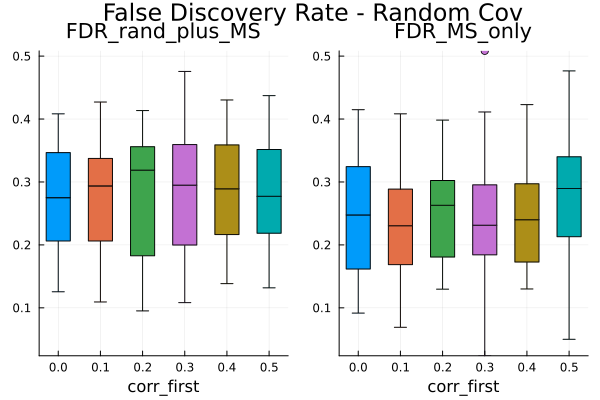

In [34]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:corr_first,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate - Random Cov"
)

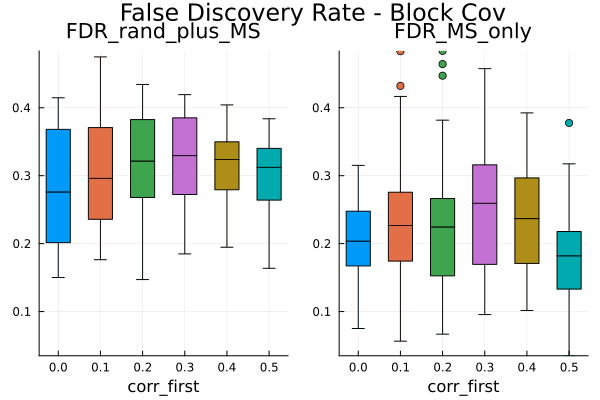

In [35]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:corr_first,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate - Block Cov"
)


There is not much distinction in FDR when looking at the strength of the first correlation, over all other combinations

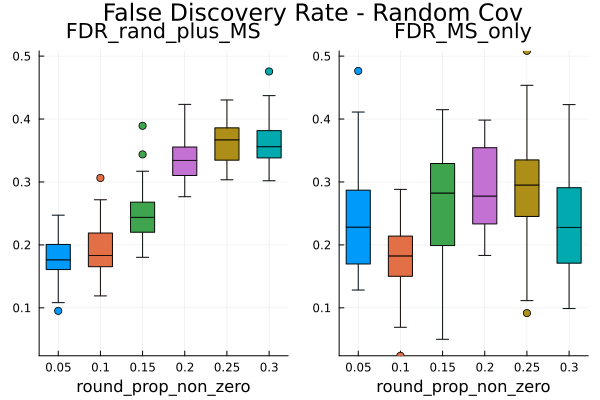

In [36]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:round_prop_non_zero,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate - Random Cov"
)

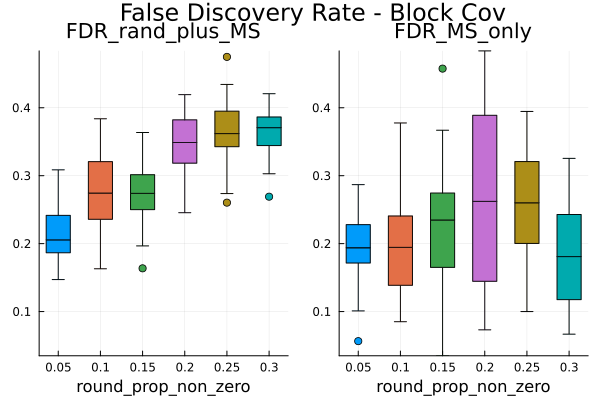

In [38]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:round_prop_non_zero,
    var_one=:FDR_rand_plus_MS, var_two=:FDR_MS_only,
    title_plot="False Discovery Rate - Block Cov"
)

#### True Positive Rate

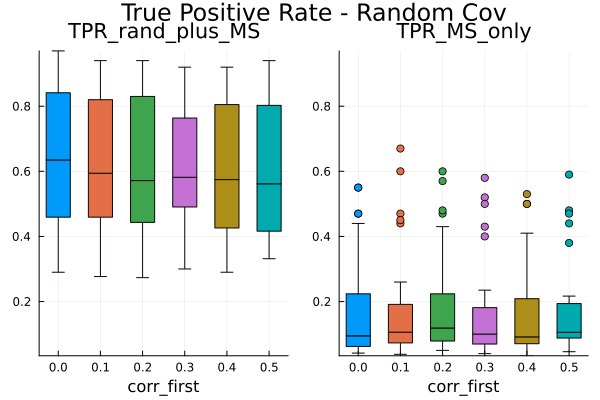

In [39]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:corr_first,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate - Random Cov"
)

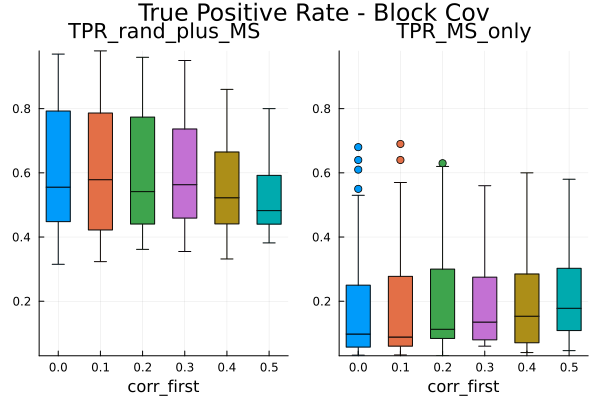

In [40]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:corr_first,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate - Block Cov"
)

True Positive Rate is consistently higher for Randomisation + MS compared to MS only, for different levels of correlation

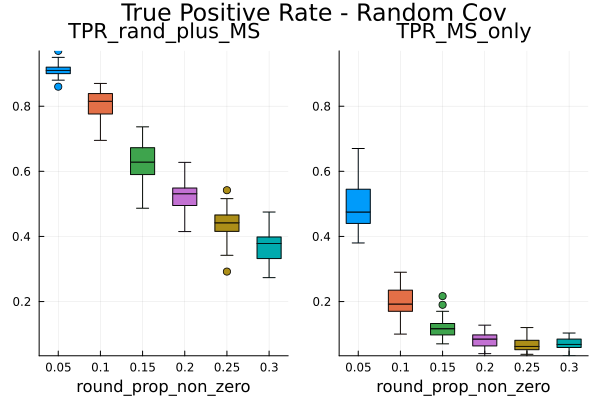

In [41]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 0, :], group_var=:round_prop_non_zero,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate - Random Cov"
)

Again the TPR for Randomisation + MS is consistently higher than MS only, for different levels of proportion of non-zero coeffiecients

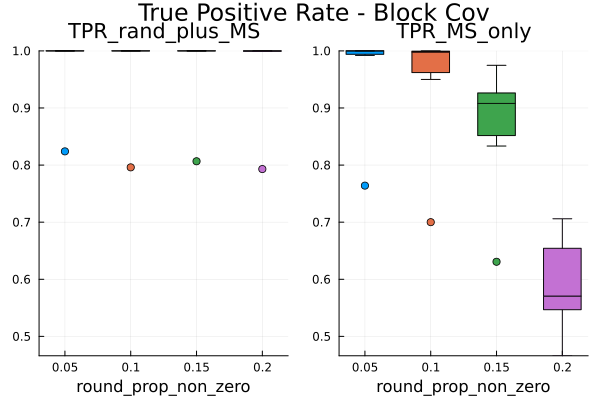

In [30]:
double_boxplot(df=df_metrics[df_metrics.block_diagonal .== 1, :], group_var=:round_prop_non_zero,
    var_one=:TPR_rand_plus_MS, var_two=:TPR_MS_only,
    title_plot="True Positive Rate - Block Cov"
)

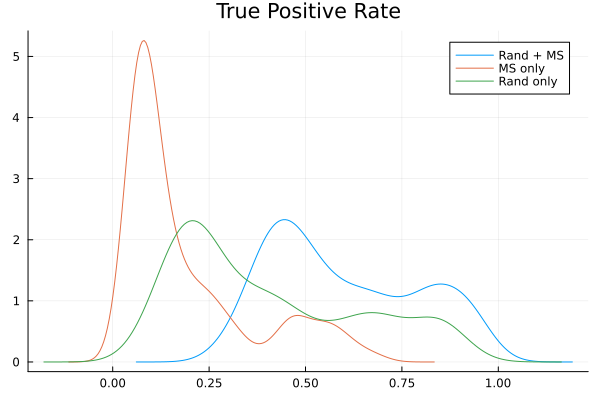

In [42]:
density(df_metrics.TPR_rand_plus_MS, label="Rand + MS")
title!("True Positive Rate")
density!(df_metrics.TPR_MS_only, label="MS only")
density!(df_metrics.TPR_rand_only, label="Rand only")

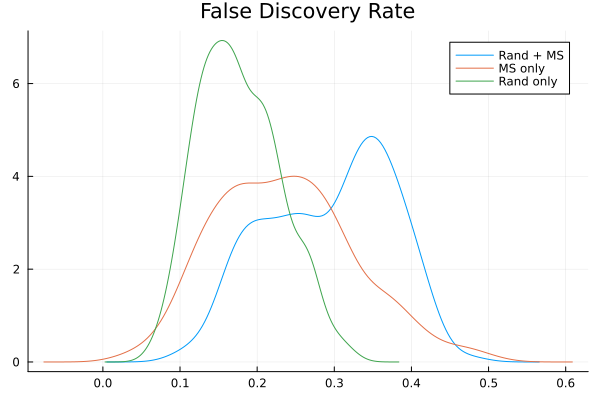

In [43]:
density(df_metrics.FDR_rand_plus_MS, label="Rand + MS")
title!("False Discovery Rate")
density!(df_metrics.FDR_MS_only, label="MS only")
density!(df_metrics.FDR_rand_only, label="Rand only")

# Summary
Performance comparison of using **Mirror Statistic with Randomisation** (Rand+MS) versus using **standard Mirror Statistic** (MS only), which refers to Mirror Statistic used with a simple Data Splitting mechanism. The metrics tracked here are False Discovery Rate (FDR) and True Positive Rate (TPR, aka Sensitivity, Recall, Hit Rate).  
In addition **Randomisation only** (Rand only) is included in the comparison. *However*, using only Randomisation does not allow for a direct adjustment and control of FDR (or maybe we could adjust the p-values assuming those of the excluded variables are 1...?), therefore empirical FDR is calculated on rejections based on p-values below the 5% threshold.  
Simulations have been done for a standard high-dimensional linear regression with n=100 observations and p=200 covariates. 10 replications have been made for each combination of the following:
- Random and Block covariance structure. The block structure implies that the 0-coefficients all belong to one block and are uncorrelated with the non-zero coefficients (which is a required assumption for Mirror Statistic to work)
- The proportion of non-zero coefficients varied between 0.05 to 0.3
- Covarites are generted from a multivariate Normal distribution with different covariance structure
    - Identity matrix
    - Toeplitz structure, with first off-diagonal correlation coefficients ranging from 0 to 0.5 and second off-diagonal correlation coefficients ranging from 0 to 0.4

### Key takeways:
- TPR is considerably higher for Rand+MS than for MS only, over all scenarios, with or without Block Covariance. This could imply a higher power using Randomistion to "split" the data between variable selection and inference on coeffiecients.
- FDR values are very close for both methods over all scenarios.
    - For Rand + MS, the FDR grows as the proportion of non-zero coefficients grows, which is intuitive as there is less information for a higher number of coefficients to be estimated. However, it is pretty much stable for MS only, with a higher variability
    - Using a Block Covariance structure seems to help the MS only
- Crucially, both methods using Mirror Statistic didn't really achieved the FDR control that was set up, i.e. 10% in this simulation. This is probably due to the violation of the assumption when using a Random Covariance. But, this is happening also when using a Block Covariance. The results show a very high variablity, where sometimes the desired FDR is properly achieved, but more often is not.
    